In [1]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')

In [2]:
nx = 10
dx = 1. / nx

Devemos obter a equação da forma: 

$$\frac{dy}{dx} = f(x,y)$$

Vamos avaliar o caso abaixo: 


$$\frac{dy}{dx} + (x + \frac{1+3x²}{1+x+x³})y = x³ + 2x + x² (\frac{1+3x²}{1+x+x³})$$

Isolando o termo diferencial, obtemos: 


$$\frac{dy}{dx} =  x³ + 2x + x² (\frac{1+3x²}{1+x+x³})-(x + \frac{1+3x²}{1+x+x³})y)$$

In [3]:
def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

In [4]:
x_space = np.linspace(0, 1, nx)    
y_space = psy_analytic(x_space)

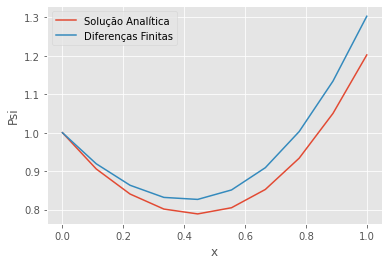

In [5]:
psy_fd = np.zeros_like(y_space)
psy_fd[0] = 1. # Initial Condition

for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx
  
plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.legend(['Solução Analítica', 'Diferenças Finitas'])
plt.xlabel('x')
plt.ylabel('Psi')
plt.show()

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def d_neural_network_dx(W, x):
    return np.dot(np.dot(W[1].T, W[0].T), sigmoid_grad(x))

def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [16]:
np.random.seed(5)
W = [np.random.rand(1, 10), np.random.rand(10, 1)]
lmb = 0.005

In [17]:
loss = []
epochs = 400

for i in range(epochs):
    loss_grad =  grad(loss_function)(W, x_space)
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
    loss.append(loss_function(W, x_space))
    


Erro: 0.13373264963887713


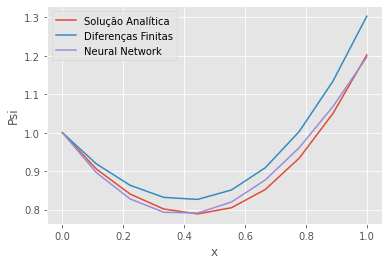

In [18]:
print ("Erro:", loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.plot(x_space, res)
plt.legend(['Solução Analítica','Diferenças Finitas','Neural Network'])
plt.xlabel('x')
plt.ylabel('Psi')
plt.show()

Text(0, 0.5, 'Loss')

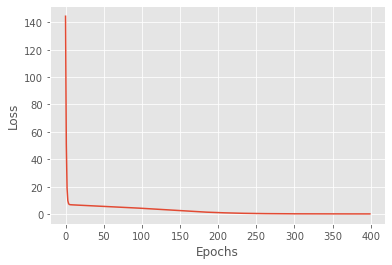

In [19]:
iterations = []
for epoch in range(0,epochs):
    iterations.append(epoch)
    
plt.plot(iterations, loss);
plt.xlabel('Epochs')
plt.ylabel('Loss')